In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [47]:
df = pd.read_csv("Super_Hero_Dataset.csv", sep=",", header=None, engine='python', encoding="utf-8-sig") # imports the dataset
# Create a new variable called 'header' from the first row of the dataset
# This calls the first row for the header
header = df.iloc[0]
# take the rest of your data minus the header row
df = df[1:]
# set the header row as the df header
df.columns = header
df.head(50)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
1,3D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...","As 3-D Man, Chuck Chandler possessed approxima...",85,30,60,60,...,0,0,0,0,0,1,0,0,0,1
2,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,Enhanced Strength: 514A demonstrated great str...,100,20,30,50,...,0,0,0,0,1,0,1,0,0,1
3,A.I.M. Agent,NaN,NaN,7,A.I.M. agents are both soldiers and scientists...,NaN,90,5,20,25,...,0,0,1,0,0,0,0,0,0,0
4,A.M.A.Z.O. (CW),NaN,NaN,22,"The Anti Metahuman Adaptive Zootomic Organism,...","With its metallic body, it easily overpowered ...",90,100,100,100,...,1,0,1,0,0,0,0,0,0,0
5,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0,0,0,0,0,0,0,0,0,0
6,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0,0,1,0,0,0,0,0,0,0
7,Aayla Secura,Aayla Secura,NaN,8,ayla Secura was a Rutian Twi'lek Jedi Knight (...,NaN,90,40,45,55,...,0,1,0,0,0,0,0,0,1,0
8,Abe Sapien,Abraham Sapien,Abraham Sapien,10,"Sapien began life as Langdon Everett Caul, a ...",Abe is a humanoid amphibious creature. He has...,95,30,35,65,...,0,1,1,1,1,0,1,1,1,1
9,Abin Sur,NaN,NaN,9,Originally a history professor on the planet ...,Abin Sur possessed an exceptionally strong s...,75,90,55,65,...,0,0,0,0,0,0,0,0,0,0
10,ABomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0,1,0,0,1,1,1,1,1,1


In [50]:
# changes all the ability variables to a numeric type from an object type. 
df['intelligence_score'] = pd.to_numeric(df['intelligence_score'], errors='coerce')
df['strength_score'] = pd.to_numeric(df['strength_score'], errors='coerce')
df['speed_score'] = pd.to_numeric(df['speed_score'], errors='coerce')
df['durability_score'] = pd.to_numeric(df['durability_score'], errors='coerce')
df['power_score'] = pd.to_numeric(df['power_score'], errors='coerce')
df['combat_score'] = pd.to_numeric(df['combat_score'], errors='coerce')

In [51]:
df['attribute_score'] = df.apply(lambda x: x['intelligence_score'] + x['strength_score']+ x['speed_score']+ x['durability_score'] + x['power_score']+ x['combat_score'], axis=1)
df

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,attribute_score
1,3D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...","As 3-D Man, Chuck Chandler possessed approxima...",85,30,60,60,...,0,0,0,0,1,0,0,0,1,345
2,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,Enhanced Strength: 514A demonstrated great str...,100,20,30,50,...,0,0,0,1,0,1,0,0,1,335
3,A.I.M. Agent,NaN,NaN,7,A.I.M. agents are both soldiers and scientists...,NaN,90,5,20,25,...,0,1,0,0,0,0,0,0,0,235
4,A.M.A.Z.O. (CW),NaN,NaN,22,"The Anti Metahuman Adaptive Zootomic Organism,...","With its metallic body, it easily overpowered ...",90,100,100,100,...,0,1,0,0,0,0,0,0,0,590
5,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0,0,0,0,0,0,0,0,0,385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,Zane,Zane,Zane,25,Zane was created by Dr. Julien in a small work...,"As a Nindroid, Zane has increased stamina and ...",100,35,50,60,...,0,1,1,1,0,1,1,1,1,445
1359,Zatanna,Zatanna Zatara,Zatanna Zatara,10,Zatanna is the daughter of adventurer John Zat...,Zatanna is genetically talented with her magi...,90,10,25,30,...,0,0,0,0,0,0,0,0,0,310
1360,Zoom,Hunter Zolomon,Hunter Zolomon,9,Hunter Zolomon had a troubled relationship wi...,"Zoom is able to alter time, to make himself ev...",75,10,100,30,...,0,0,0,0,1,0,0,0,0,345
1361,Zoom (New 52),Hunter Zolomon,NaN,20,"Hunter Zolomon is better known as Zoom, a spee...",After tricking Barry Allen and Wally West into...,95,50,100,75,...,1,0,1,1,1,1,1,1,1,500


In [52]:
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].sum())  
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].mean())  
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].std())
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].mode())
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].median())
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].describe())
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].describe())
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].head())
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].var())
print(df[['name','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']].head())

0
name                  3D Man514A (Gotham)A.I.M. AgentA.M.A.Z.O. (CW)...
has_super_strength    1100000101100111011000000000010111001011010100...
intelligence_score                                               112260
strength_score                                                    56040
speed_score                                                       65780
durability_score                                                  79915
power_score                                                       95195
combat_score                                                      96960
dtype: object
0
has_super_strength          inf
intelligence_score    82.422907
strength_score        41.145374
speed_score           48.296623
durability_score      58.674743
power_score           69.893539
combat_score          71.189427
dtype: float64
0
intelligence_score    19.505353
strength_score        34.067436
speed_score           28.030478
durability_score      30.003464
power_score           30.593680
comba

In [53]:
df1 = df[['name','attribute_score','has_agility','overall_score','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']]

In [54]:
df1['intelligence_score'] = pd.to_numeric(df1['intelligence_score'].astype('float64'))
df1['strength_score'] = pd.to_numeric(df1['strength_score'].astype('float64'))
df1['speed_score'] = pd.to_numeric(df1['speed_score'].astype('float64'))
df1['durability_score'] = pd.to_numeric(df1['durability_score'].astype('float64'))
df1['power_score'] = pd.to_numeric(df1['power_score'].astype('float64'))
df1['combat_score'] = pd.to_numeric(df1['combat_score'].astype('float64'))
df1['overall_score'] = pd.to_numeric(df1['overall_score'].astype('float64'))
df1['attribute_score'] = pd.to_numeric(df1['attribute_score'].astype('float64'))

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [55]:
df1.dropna(how='all',thresh=75)
len(df)

1362

In [56]:
df1.dropna(subset=['name','overall_score','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score'])

,name,attribute_score,has_agility,overall_score,has_super_strength,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
1,3D Man,345.0,0,6.0,1,85.0,30.0,60.0,60.0,40.0,70.0
2,514A (Gotham),335.0,0,10.0,1,100.0,20.0,30.0,50.0,35.0,100.0
3,A.I.M. Agent,235.0,0,7.0,0,90.0,5.0,20.0,25.0,25.0,70.0
4,A.M.A.Z.O. (CW),590.0,0,22.0,0,90.0,100.0,100.0,100.0,100.0,100.0
5,Aa,385.0,0,12.0,0,80.0,50.0,55.0,45.0,100.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...
1358,Zane,445.0,1,25.0,1,100.0,35.0,50.0,60.0,100.0,100.0
1359,Zatanna,310.0,0,10.0,0,90.0,10.0,25.0,30.0,100.0,55.0
1360,Zoom,345.0,0,9.0,0,75.0,10.0,100.0,30.0,100.0,30.0
1361,Zoom (New 52),500.0,1,20.0,1,95.0,50.0,100.0,75.0,100.0,80.0


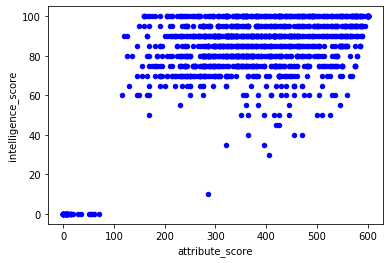

In [76]:
df.plot(kind='scatter',x='attribute_score',y='intelligence_score',color='Blue')
plt.show()

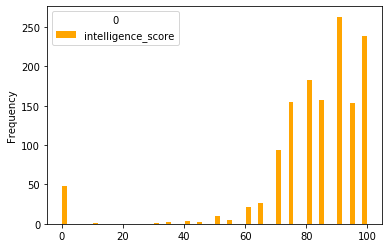

In [58]:
df1[['intelligence_score']].plot(kind='hist',bins=50,rwidth=.8, color='orange')
plt.show()

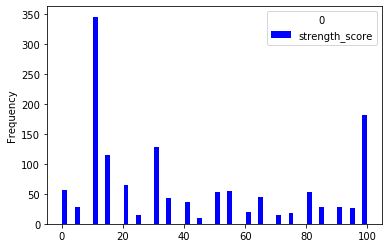

In [59]:
df1[['strength_score']].plot(kind='hist',bins=50,rwidth=.8, color='Blue')
plt.show()

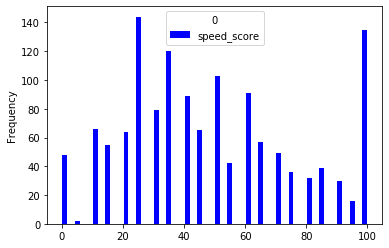

In [60]:
df1[['speed_score']].plot(kind='hist',bins=50,rwidth=.8, color='Blue')
plt.show()

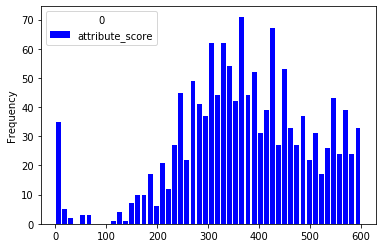

In [61]:
df1[['attribute_score']].plot(kind='hist',bins=50,rwidth=.8, color='Blue')
plt.show()

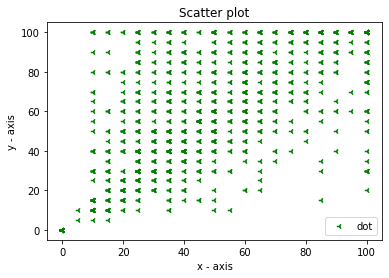

In [62]:
x = df1[['speed_score']]
y = df1[['durability_score']]

plt.scatter(x, y, label="dot", color="green",
            marker="3", s=30)


plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.title('Scatter plot')
plt.legend()

plt.show()

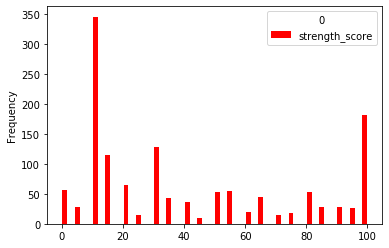

In [63]:
df1[['strength_score']].plot(kind='hist',bins=50,rwidth=.8, color='red')
plt.show()

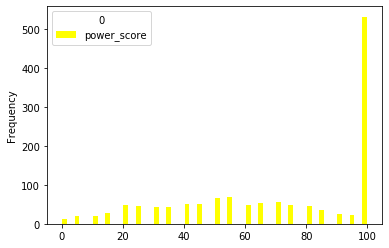

In [64]:
df1[['power_score']].plot(kind='hist',bins=50,rwidth=.8, color='yellow')
plt.show()

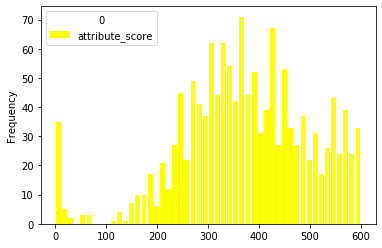

In [65]:
df1[['attribute_score']].plot(kind='hist',bins=50,rwidth=.8, color='yellow')
plt.show()

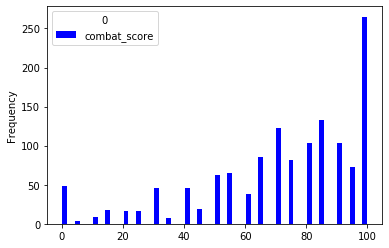

In [66]:
df1[['combat_score']].plot(kind='hist',bins=50,rwidth=.8, color='Blue')
plt.show()

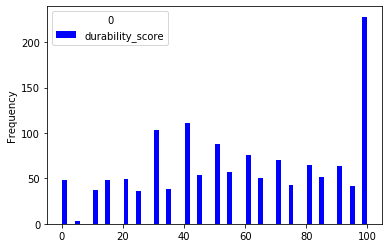

In [67]:
df1[['durability_score']].plot(kind='hist',bins=50,rwidth=.8, color='Blue')
plt.show()

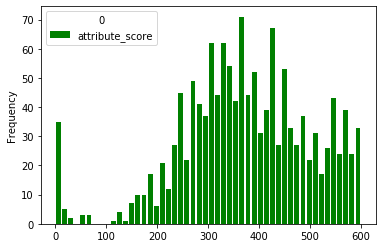

In [68]:
df1[['attribute_score']].plot(kind='hist',bins=50,rwidth=.8, color='green')
plt.show()

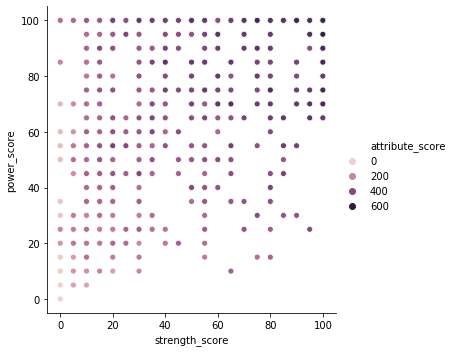

In [77]:
sns.relplot(x="strength_score",y="power_score",hue="attribute_score",data=df)

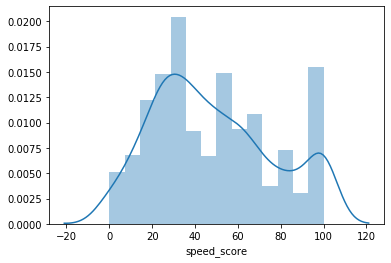

In [81]:
sns.distplot(df["speed_score"])

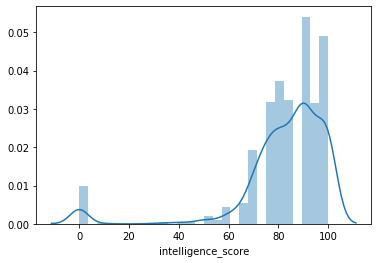

In [78]:
sns.distplot(df["intelligence_score"])

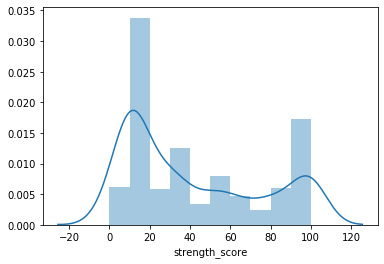

In [79]:
sns.distplot(df["strength_score"])

In [71]:
# ANOVA Hypothesis test    
from scipy.stats import f_oneway                  # For use in project
data1 = df['attribute_score']
data2 = df['overall_score']
#data3 = df['Rank']
stat, p = f_oneway(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p <= 0.05:
	print('Accept null hypothesis they are Probably the same distribution')
else:
	print('Reject the null hypothesis, they are Probably different distributions')

stat=nan, p=nan
Reject the null hypothesis, they are Probably different distributions
